In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast

c:\Anaconda3\envs\project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = load_dataset('lukebarousse/data_jobs')

df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)

In [3]:
df_ba= df[df['job_title_short'] == 'Business Analyst'].copy()

df_ba['job_posted_month'] = df_ba['job_posted_date'].dt.month

df_ba_explode = df_ba.explode('job_skills')

df_ba_pivot = df_ba_explode.pivot_table(index='job_posted_month', columns='job_skills',aggfunc='size',fill_value=0)

df_ba_pivot

job_skills,airflow,airtable,alteryx,angular,ansible,apl,arch,asana,asp.net,asp.net core,...,vue.js,watson,webex,windows,wire,word,workfront,wrike,yarn,zoom
job_posted_month,,,,,,,,,,,,,,,,,,,,,
1,18,1,106,11,14,0,1,3,3,0,...,0,16,0,55,12,394,1,0,1,19
2,25,3,98,6,7,0,0,5,5,0,...,2,4,0,48,4,267,1,0,2,9
3,18,1,83,3,20,0,0,7,1,0,...,0,17,2,38,6,268,1,2,6,7
4,24,2,114,4,5,0,1,5,6,0,...,0,14,1,52,2,327,4,0,0,9
5,27,0,71,4,2,0,1,3,5,0,...,0,1,1,33,2,176,0,0,1,8
6,25,1,92,5,5,0,1,5,2,0,...,0,5,1,36,5,293,1,0,1,6
7,32,2,72,8,16,1,0,11,3,1,...,0,4,3,43,3,302,0,0,0,7
8,34,0,103,12,15,0,1,3,3,0,...,1,8,5,58,7,396,0,0,1,12
9,23,1,91,5,16,0,3,5,4,1,...,0,3,2,68,6,341,1,0,0,16


In [ ]:
df_ba_pivot.loc['Total'] = df_ba_pivot.sum()

df_ba_pivot= df_ba_pivot[df_ba_pivot.loc['Total'].sort_values(ascending=False).index]

df_ba_pivot = df_ba_pivot.drop('Total')


In [6]:
df_ba_pivot = df_ba_pivot.reset_index()
df_ba_pivot

job_skills,job_posted_month,sql,excel,tableau,power bi,python,powerpoint,r,word,sap,...,svelte,digitalocean,tidyr,shogun,codecommit,capacitor,ionic,chainer,kali,f#
0,1,1800,1768,938,869,823,493,449,394,406,...,0,0,0,0,0,0,0,1,0,0
1,2,1326,1266,743,663,596,363,337,267,269,...,0,0,0,0,0,0,0,0,0,0
2,3,1279,1252,677,706,613,337,285,268,249,...,0,0,0,0,0,0,0,0,0,0
3,4,1488,1555,789,717,631,427,301,327,362,...,0,0,0,0,0,0,0,0,0,0
4,5,924,884,537,489,407,232,220,176,162,...,0,0,0,0,0,0,0,0,0,0
5,6,1262,1295,689,660,570,358,265,293,321,...,0,0,1,0,0,0,0,0,0,0
6,7,1462,1285,789,804,698,366,351,302,310,...,0,0,0,1,1,0,0,0,0,0
7,8,1874,1844,984,1011,899,461,441,396,369,...,0,1,0,0,0,0,0,0,1,0
8,9,1510,1449,775,833,675,424,357,341,259,...,0,0,0,0,0,0,0,0,0,0
9,10,1612,1674,880,927,793,395,397,336,339,...,0,0,0,0,0,0,1,0,0,0


In [9]:
df_ba_pivot['job_posted_months'] = df_ba_pivot['job_posted_month'].apply(lambda month : pd.to_datetime(month, format='%m').strftime('%b'))

df_ba_pivot = df_ba_pivot.set_index('job_posted_months')

df_ba_pivot = df_ba_pivot.drop(columns='job_posted_month')

df_ba_pivot


job_skills,sql,excel,tableau,power bi,python,powerpoint,r,word,sap,sas,...,svelte,digitalocean,tidyr,shogun,codecommit,capacitor,ionic,chainer,kali,f#
job_posted_months,,,,,,,,,,,,,,,,,,,,,
Jan,1800,1768,938,869,823,493,449,394,406,394,...,0,0,0,0,0,0,0,1,0,0
Feb,1326,1266,743,663,596,363,337,267,269,312,...,0,0,0,0,0,0,0,0,0,0
Mar,1279,1252,677,706,613,337,285,268,249,280,...,0,0,0,0,0,0,0,0,0,0
Apr,1488,1555,789,717,631,427,301,327,362,278,...,0,0,0,0,0,0,0,0,0,0
May,924,884,537,489,407,232,220,176,162,172,...,0,0,0,0,0,0,0,0,0,0
Jun,1262,1295,689,660,570,358,265,293,321,250,...,0,0,1,0,0,0,0,0,0,0
Jul,1462,1285,789,804,698,366,351,302,310,282,...,0,0,0,1,1,0,0,0,0,0
Aug,1874,1844,984,1011,899,461,441,396,369,322,...,0,1,0,0,0,0,0,0,1,0
Sep,1510,1449,775,833,675,424,357,341,259,346,...,0,0,0,0,0,0,0,0,0,0


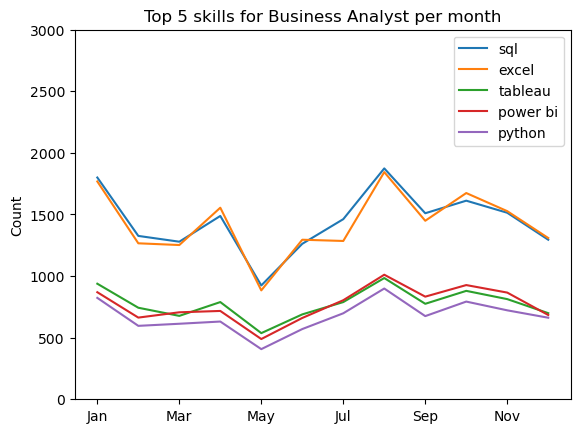

In [16]:
df_ba_pivot.iloc[:,:5].plot(kind='line')
plt.title('Top 5 skills for Business Analyst per month')
plt.xlabel('')
plt.ylabel('Count')
plt.legend()
plt.ylim(0,3000)
plt.show()